# <center>Analyzing the disproportionate impacts of remote learning on rich vs poor states</center>
## <center> By: Landon Bragg and Ben Kim
</center>

## Abstract
The outbreak of the COVID-19 pandemic forced an unprecedented shift in education systems worldwide, leading to the widespread adoption of remote learning. This study aims to comprehensively investigate the impact of remote learning and the COVID-19 pandemic on poor vs. rich student's education outcomes. We are using a dataset comprising academic performance metrics after the pandemic pushed remote learning into action. By comparing pre-pandemic and pandemic-era data, we aim to analyze the specific effects on different demographics of the transition to remote learning on academic achievement and overall educational attainment. Ultimately, this research endeavors to inform policymakers, educators, and administrative staff about the challenges and opportunities presented by the transition to remote learning in the context of the COVID-19 pandemic.

## About 
We utilized five datasets for our analysis. Two of these datasets provide insights into the distribution of remote, in-person, and hybrid schooling models within each state, with one dataset capturing data from 2020 and the other from 2021. The third and fourth datasets focus on quantitative SAT statistics across states, encompassing data from both 2020 and 2021. We chose to modify our data to only include the top 20 states in terms of SAT participation so that outliers do not have too large of an effect on our research. Finally, our fifth dataset contains the median income of the 20 states so that we can analyze how wealth disparity and remote learning interact.

In [1]:
#Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Two of the files are learning modalities for 2020 and 2021 and the other files are SAT statistics by state for 2020 and 2021.

In [2]:
# Read necessary files
df1 = pd.read_csv('sl20.csv')
df2 = pd.read_csv('sl21.csv')
sat20 = pd.read_csv('sat20.csv')
sat21 = pd.read_csv('sat21.csv')

sat20.fillna(0, inplace = True)
sat21.fillna(0, inplace = True)

We are trying to get a better understanding of the learning modality datasets. We want to see how drastic of a change in remote learning there is by calculating percentages.

### Descriptive Statistics

In [3]:
# Filtering for certain values in our dataset, we were able to get a better understanding 
# of our data.
remote_2020 = (df1['learning_modality'] == "Remote").sum()
in_person_2020 = (df1['learning_modality'] == "In Person").sum()
hybrid_2020 = (df1['learning_modality'] == "Hybrid").sum()

remote_2021 = (df2['Learning Modality'] == "Remote").sum()
in_person_2021 = (df2['Learning Modality'] == "In Person").sum()
hybrid_2021 = (df2['Learning Modality'] == "Hybrid").sum()


print("Remote 2020: ", remote_2020)
print("Remote 2021: ", remote_2021)
print("In Person 2020: ", in_person_2020)
print("In Person 2021: ", in_person_2021)
print("Hybrid 2020: ", hybrid_2020)
print("Hybrid 2021: ", hybrid_2021)

total_2020 = remote_2020 + in_person_2020 + hybrid_2020
total_2021 = remote_2021 + in_person_2021 + hybrid_2021


print("Total schools recorded in 2020", total_2020)
print("Total schools recorded in 2021", total_2021)


remote_2020_proportion = remote_2020/total_2020
in_person_2020_proportion = in_person_2020/total_2020
hybrid_2020_proportion = hybrid_2020/total_2020


remote_2021_proportion = remote_2021/total_2021
in_person_2021_proportion = in_person_2021/total_2021
hybrid_2021_proportion = hybrid_2021/total_2021

print("Proportion of remote schools in 2020: ", remote_2020_proportion)
print("Proportion of In Person  schools in 2021: ", in_person_2021_proportion)
print("Proportion of Hybrid schools in 2020: ", hybrid_2020_proportion)
print("Proportion of remote schools in 2021: ", remote_2021_proportion)
print("Proportion of In Person schools in 2020: ", in_person_2020_proportion)
print("Proportion of Hybrid schools in 2021: ", hybrid_2021_proportion)


Remote 2020:  20322
Remote 2021:  712
In Person 2020:  76728
In Person 2021:  396806
Hybrid 2020:  82535
Hybrid 2021:  2723
Total schools recorded in 2020 179585
Total schools recorded in 2021 400241
Proportion of remote schools in 2020:  0.1131608987387588
Proportion of In Person  schools in 2021:  0.9914176708533109
Proportion of Hybrid schools in 2020:  0.45958738201965643
Proportion of remote schools in 2021:  0.0017789281957620534
Proportion of In Person schools in 2020:  0.4272517192415848
Proportion of Hybrid schools in 2021:  0.0068034009509270665


### Seeing the changes from remote and hybrid learning to In-Person from 2020-2021

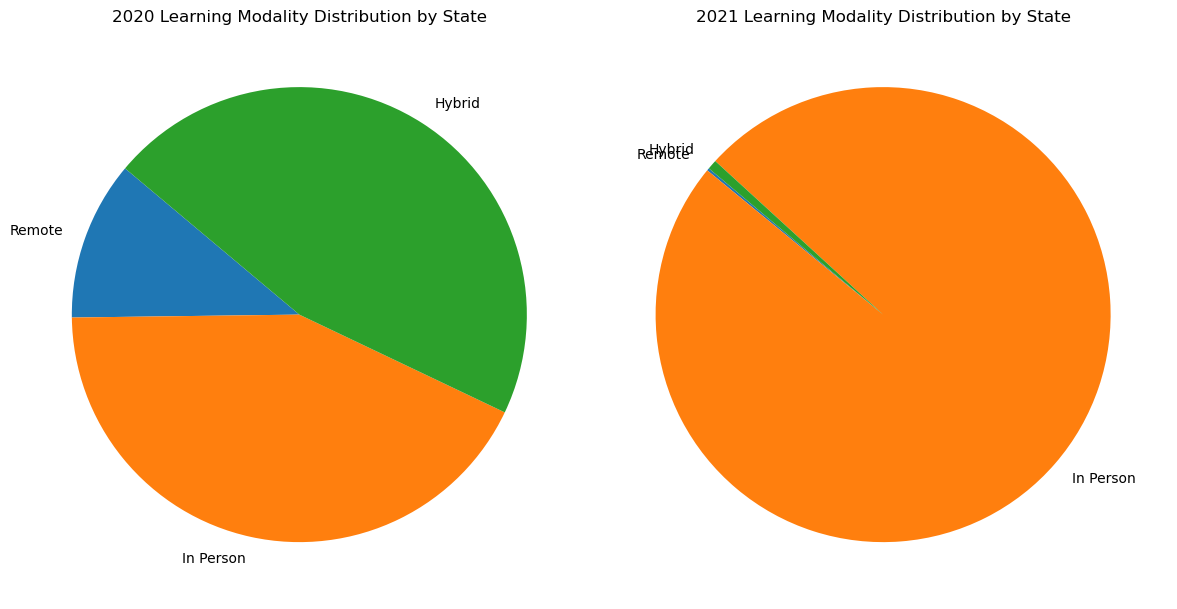

In [4]:
total_schools_2020 = (df1['learning_modality'] == "Remote") + (df1['learning_modality'] == "In Person") + (df1['learning_modality'] == "Hybrid")
total_schools_2021 = (df2['Learning Modality'] == "Remote") + (df2['Learning Modality'] == "In Person") + (df2['Learning Modality'] == "Hybrid")

# Calculate proportions of learning modalities for 2020 and 2021
remote_prop_2020 = (df1['learning_modality'] == "Remote").sum() / total_schools_2020
in_person_prop_2020 = (df1['learning_modality'] == "In Person").sum() / total_schools_2020
hybrid_prop_2020 = (df1['learning_modality'] == "Hybrid").sum() / total_schools_2020

remote_prop_2021 = (df2['Learning Modality'] == "Remote").sum() / total_schools_2021
in_person_prop_2021 = (df2['Learning Modality'] == "In Person").sum() / total_schools_2021
hybrid_prop_2021 = (df2['Learning Modality'] == "Hybrid").sum() / total_schools_2021

# Plot pie chart for 2020
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie([remote_prop_2020.mean(), in_person_prop_2020.mean(), hybrid_prop_2020.mean()], labels=['Remote', 'In Person', 'Hybrid'], startangle=140)
plt.title('2020 Learning Modality Distribution by State')

# Plot pie chart for 2021
plt.subplot(1, 2, 2)
plt.pie([remote_prop_2021.mean(), in_person_prop_2021.mean(), hybrid_prop_2021.mean()], labels=['Remote', 'In Person', 'Hybrid'], startangle=140)
plt.title('2021 Learning Modality Distribution by State')

plt.tight_layout()
plt.show()

As we can see from these pie plots we see that there is a huge jump from 2020 to 2021 in terms of learning modalities. This is significant because it allows us to analyze changing test scores based on remote learning vs in-person learning.

### Elbow Method

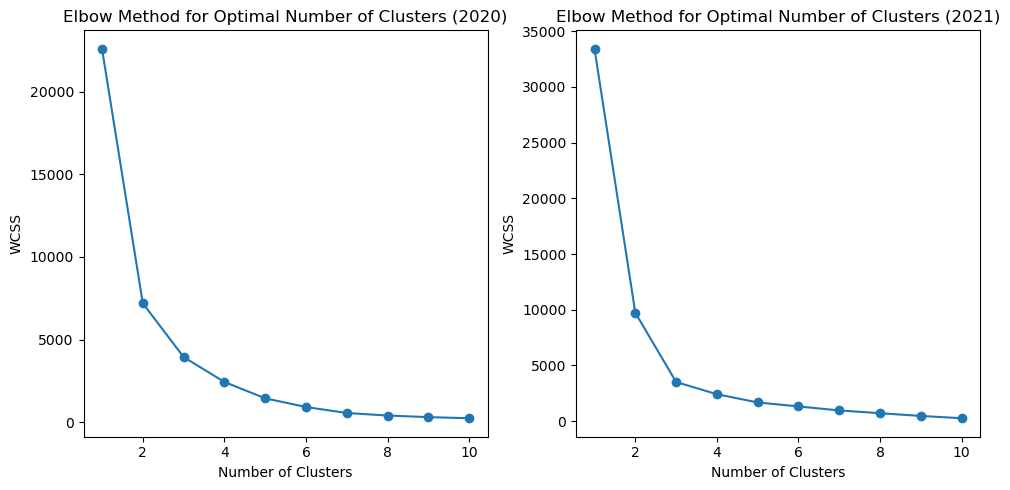

In [5]:
sat20 = pd.read_csv('sat20.csv')
sat21 = pd.read_csv('sat21.csv')

# Reading only important columns
sat20 = sat20.iloc[1:, [0, 3, 5]]
sat21 = sat21.iloc[1:, [0, 3, 5]]

sat20.columns = ['State', 'Mean of ERW', 'Mean of Math']
sat21.columns = ['State', 'Mean of ERW', 'Mean of Math']

def calculate_wcss(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

X_2020 = sat20[['Mean of ERW', 'Mean of Math']].values

# Suppresses ugly warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    wcss_2020 = calculate_wcss(X_2020)

X_2021 = sat21[['Mean of ERW', 'Mean of Math']].values

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    wcss_2021 = calculate_wcss(X_2021)

plt.figure(figsize=(10, 5))

#Plot 2020 Elbow method
plt.subplot(1, 2, 1)
plt.plot(range(1, len(wcss_2020) + 1), wcss_2020, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (2020)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

#Plot 2021 Elbow method
plt.subplot(1, 2, 2)
plt.plot(range(1, len(wcss_2021) + 1), wcss_2021, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (2021)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()



From using the elbow method we determine that 3 clusters is optimal for our analysis of SAT scores

### Implementing K-Means Clustering for SAT Total Score by Standard Deviation


2020 SAT Scores Clusters:
Cluster 0: Connecticut, Delaware, Florida, Idaho, Illinois, Michigan, Rhode Island, Texas, West Virginia
Cluster 1: Indiana, Massachusetts, New Jersey, Virginia
Cluster 2: Colorado, Georgia, Maryland, New Hampshire, New Mexico, New York, South Carolina

2021 SAT Scores Clusters:
Cluster 0: Connecticut, Delaware, Florida, Idaho, Illinois, Michigan, New Mexico, Rhode Island, South Carolina, Texas, West Virginia
Cluster 1: Colorado, Georgia, Indiana, Maryland, New Hampshire, New York
Cluster 2: Massachusetts, New Jersey, Virginia


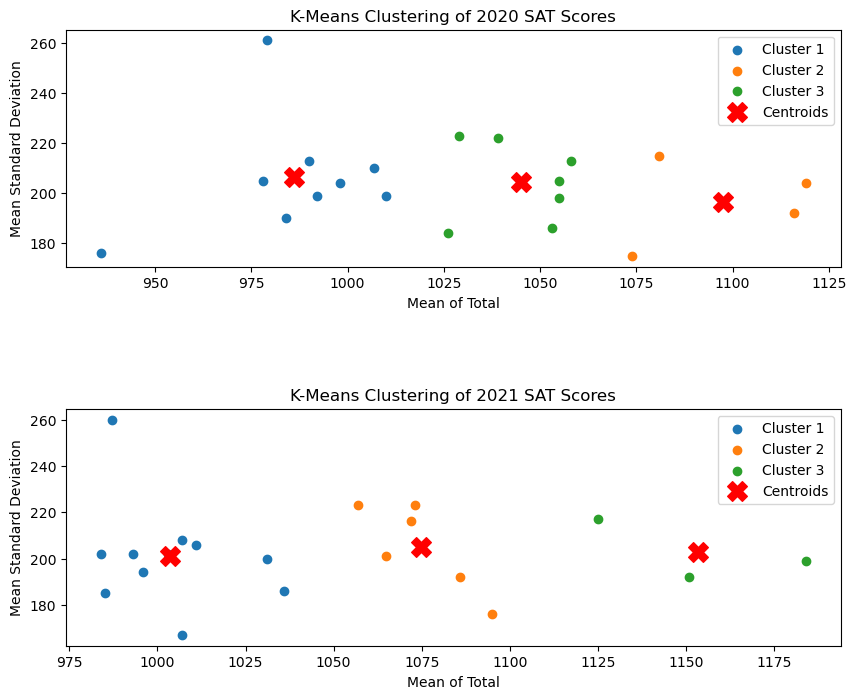

In [6]:
df1 = pd.read_csv('sat20.csv')
df2 = pd.read_csv('sat21.csv')

# Choose only the 1st and 2nd columns to get the mean of total and standard deviation of total
X_2020 = df1.iloc[1:, [1,2]].values  
X_2021 = df2.iloc[1:, [1,2]].values 

# Suppress warnings to make output more appealing
warnings.filterwarnings("ignore", category=FutureWarning)

# Implement KMeans Clustering
kclust_2020 = KMeans(n_clusters=3, n_init=10, random_state=42)
kclust_2021 = KMeans(n_clusters=3, n_init=10, random_state=42)

clusters_2020 = kclust_2020.fit_predict(X_2020)
clusters_2021 = kclust_2021.fit_predict(X_2021)

plt.figure(figsize=(10, 8))

# Plot 2020 KMeans
plt.subplot(2, 1, 1)
for i in range(3):
    plt.scatter(X_2020[clusters_2020 == i, 0], X_2020[clusters_2020 == i, 1], label=f'Cluster {i+1}')

plt.scatter(kclust_2020.cluster_centers_[:, 0], kclust_2020.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of 2020 SAT Scores')
plt.xlabel('Mean of Total')
plt.ylabel('Mean Standard Deviation')
plt.legend()

# Plot 2021 KMeans
plt.subplot(2, 1, 2)
for i in range(3):
    plt.scatter(X_2021[clusters_2021 == i, 0], X_2021[clusters_2021 == i, 1], label=f'Cluster {i+1}')

plt.scatter(kclust_2021.cluster_centers_[:, 0], kclust_2021.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of 2021 SAT Scores')
plt.xlabel('Mean of Total')
plt.ylabel('Mean Standard Deviation')
plt.legend()

plt.subplots_adjust(hspace=0.6)  

# Look at the list of states in each cluster to get a better understanding of the clusters
print("\n2020 SAT Scores Clusters:")
for cluster_label in range(kclust_2020.n_clusters):
    cluster_data = df1.iloc[1:][clusters_2020 == cluster_label]
    states_in_cluster = ", ".join(cluster_data['States'].values)
    print(f"Cluster {cluster_label}: {states_in_cluster}")

# Look at the list of states in each cluster to get a better understanding of the clusters
print("\n2021 SAT Scores Clusters:")
for cluster_label in range(kclust_2021.n_clusters):
    cluster_data = df2.iloc[1:][clusters_2021 == cluster_label]
    states_in_cluster = ", ".join(cluster_data['States'].values)
    print(f"Cluster {cluster_label}: {states_in_cluster}")

plt.show()



We want to get a good understanding of the changes in mean and standard deviation so we can get a broad understanding of the changes from 2020 to 2021 in terms of SAT scores. Therefore, we plot the centroids which are the mean values of each cluster. Analyzing these values is easier than looking at the plot.

In [7]:
print("\n2020 SAT Scores Centroid Values:")
for i, centroid in enumerate(kclust_2020.cluster_centers_):
    print(f"Centroid {i+1}: Mean of Total = {centroid[0]:.2f}, Mean Standard Deviation = {centroid[1]:.2f}")

print("\n2021 SAT Scores Centroid Values:")
for i, centroid in enumerate(kclust_2021.cluster_centers_):
    print(f"Centroid {i+1}: Mean of Total = {centroid[0]:.2f}, Mean Standard Deviation = {centroid[1]:.2f}")



2020 SAT Scores Centroid Values:
Centroid 1: Mean of Total = 986.00, Mean Standard Deviation = 206.33
Centroid 2: Mean of Total = 1097.50, Mean Standard Deviation = 196.50
Centroid 3: Mean of Total = 1045.00, Mean Standard Deviation = 204.43

2021 SAT Scores Centroid Values:
Centroid 1: Mean of Total = 1003.64, Mean Standard Deviation = 201.09
Centroid 2: Mean of Total = 1074.67, Mean Standard Deviation = 205.17
Centroid 3: Mean of Total = 1153.33, Mean Standard Deviation = 202.67


### Implementing K-Means Clustering for Mean of ERW by Mean of Math

Cluster 1 (2020): Massachusetts, Virginia
Cluster 2 (2020): Connecticut, Delaware, Florida, Idaho, Illinois, Michigan, Rhode Island, Texas, West Virginia
Cluster 3 (2020): Colorado, Georgia, Indiana, Maryland, New Hampshire, New Jersey, New Mexico, New York, South Carolina
Cluster 1 (2021): Connecticut, Delaware, Florida, Idaho, Illinois, Michigan, New Mexico, Rhode Island, South Carolina, Texas, West Virginia
Cluster 2 (2021): Colorado, Georgia, Indiana, Maryland, New Hampshire, New York
Cluster 3 (2021): Massachusetts, New Jersey, Virginia


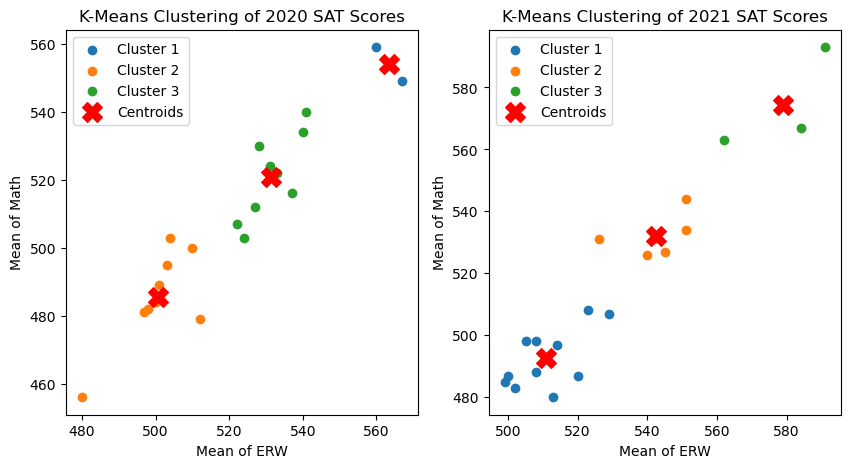

<Figure size 1000x500 with 0 Axes>

In [8]:
df1 = pd.read_csv('sat20.csv')
df2 = pd.read_csv('sat21.csv')

# Choose only relavent columns, being Mean of ERW and Mean of Math in this case
X_2020 = df1.iloc[1:, [3,5]].values  
X_2021 = df2.iloc[1:, [3,5]].values  

# Supress warnings to make output look nicer
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans_2020 = KMeans(n_clusters=3, random_state=42)
    kmeans_2021 = KMeans(n_clusters=3, random_state=42)

    clusters_2020 = kmeans_2020.fit_predict(X_2020)
    clusters_2021 = kmeans_2021.fit_predict(X_2021)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X_2020[clusters_2020 == i, 0], X_2020[clusters_2020 == i, 1], label=f'Cluster {i+1}')

# Plot 2020 KMeans Clustering
plt.scatter(kmeans_2020.cluster_centers_[:, 0], kmeans_2020.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of 2020 SAT Scores')
plt.xlabel('Mean of ERW')
plt.ylabel('Mean of Math')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_2021[clusters_2021 == i, 0], X_2021[clusters_2021 == i, 1], label=f'Cluster {i+1}')

# Plot 2021 KMeans Clustering
plt.scatter(kmeans_2021.cluster_centers_[:, 0], kmeans_2021.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of 2021 SAT Scores')
plt.xlabel('Mean of ERW')
plt.ylabel('Mean of Math')
plt.legend()

plt.figure(figsize=(10, 5))

# Print the values of each cluster so that we can get a better understanding of what each cluster is like
for i in range(3):
    cluster_i_states = df1['States'][1:][clusters_2020 == i].tolist() 
    print(f'Cluster {i+1} (2020): {", ".join(cluster_i_states)}')

for i in range(3):
    cluster_i_states = df2['States'][1:][clusters_2021 == i].tolist()  
    print(f'Cluster {i+1} (2021): {", ".join(cluster_i_states)}')

plt.tight_layout()
plt.show()

 


We want to get a good understanding of the changes in Mean of ERW (English Reading and Writing) and Mean of Math so we can get a broad understanding of the changes from 2020 to 2021. Therefore, we plot the centroids which are the mean values of each cluster. Analyzing the changes in these values is easier than looking at the plot.

In [9]:
print("Centroid values for 2020:")
for i, centroid in enumerate(kmeans_2020.cluster_centers_):
    print(f"Centroid {i+1}: Mean of ERW = {centroid[0]:.2f}, Mean of Math = {centroid[1]:.2f}")

print("\nCentroid values for 2021:")
for i, centroid in enumerate(kmeans_2021.cluster_centers_):
    print(f"Centroid {i+1}: Mean of ERW = {centroid[0]:.2f}, Mean of Math = {centroid[1]:.2f}")


Centroid values for 2020:
Centroid 1: Mean of ERW = 563.50, Mean of Math = 554.00
Centroid 2: Mean of ERW = 500.56, Mean of Math = 485.44
Centroid 3: Mean of ERW = 531.44, Mean of Math = 520.89

Centroid values for 2021:
Centroid 1: Mean of ERW = 511.00, Mean of Math = 492.55
Centroid 2: Mean of ERW = 542.50, Mean of Math = 532.17
Centroid 3: Mean of ERW = 579.00, Mean of Math = 574.33


### Implementing K-Means Clustering for SAT Total Score by Income

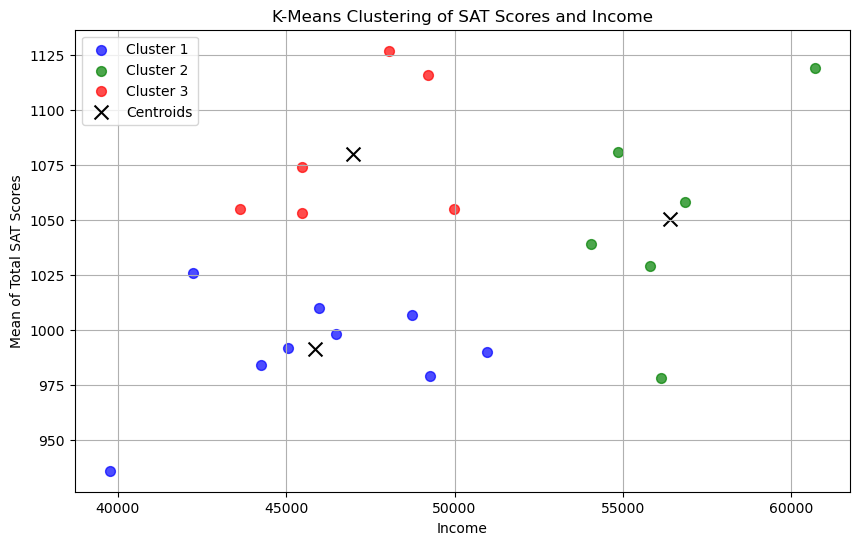

Cluster 1: Delaware, Florida, Idaho, Illinois, Michigan, Rhode Island, South Carolina, Texas, West Virginia
Cluster 2: Colorado, Connecticut, Maryland, Massachusetts, New Jersey, New York
Cluster 3: US Average, Georgia, Indiana, New Hampshire, New Mexico, Virginia


In [10]:
sat_data = pd.read_csv('sat20.csv')
# Introducing a new dataset that includes the median income of the 20 states that we 
# selected for our analysis because of their high SAT testing rate.
income_data = pd.read_csv('income.csv')

merged_data = pd.merge(sat_data, income_data, on='States')

# Merging our 2 datasets on the "States" column so that we can do a comprehensive analysis
X = merged_data[['Income', 'Mean of Total']]

# Implement KMeans Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3 # Number of clusters which we determined by the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))

cluster_colors = ['blue', 'green', 'red']

# Plot the scatter plot of income and mean SAT score by state
for cluster_num in range(k):
    cluster_points = X[labels == cluster_num]
    plt.scatter(cluster_points['Income'], cluster_points['Mean of Total'], 
                label=f'Cluster {cluster_num + 1}', color=cluster_colors[cluster_num],
                s=50, alpha=0.7)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_income = centroids[:, 0]
centroids_sat = centroids[:, 1]
plt.scatter(centroids_income, centroids_sat, marker='x', s=100, c='black', label='Centroids')

# Make the plot legible
plt.xlabel('Income')
plt.ylabel('Mean of Total SAT Scores')
plt.title('K-Means Clustering of SAT Scores and Income')
plt.legend()
plt.grid(True)
plt.show()

# Output the values of each cluster so we can further analyze the values in the clusters
cluster_states = {i: [] for i in range(k)}

for state, cluster in zip(merged_data['States'], labels):
    cluster_states[cluster].append(state)

for cluster, states in cluster_states.items():
    print(f"Cluster {cluster + 1}: {', '.join(states)}")


We want to look at how income and SAT score are correlated so we print out the centroid values which allows us to get a better understanding. Since the centroids are the mean values of each cluster, it is easier to look at these values because the changes in value can be numerically quantified. As we can see from the plot there is one centroid that is far richer than the other two. However the other 2 centroids, despite being similar in wealth, have a gap in SAT scores.

In [11]:
print("Centroid values:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i + 1}: Income = {centroid[0]:.2f}, SAT Score = {centroid[1]:.2f}")

Centroid values:
Centroid 1: Income = 45860.00, SAT Score = 991.33
Centroid 2: Income = 56396.67, SAT Score = 1050.67
Centroid 3: Income = 46971.67, SAT Score = 1080.00


### Analyzing how Income Impacted SAT scores from 2020-2021

To analyze how the rich states reacted to remote learning compared to poor states, we will compare the changes in SAT scores between the 6 richest and 6 of the poorest states. Looking at the clustering and looking at the datasets makes this easier to do.

In [12]:
sat_2020 = pd.read_csv('sat20.csv')
sat_2021 = pd.read_csv('sat21.csv')

# Looking at the changes from 2020 to 2021 for only the 6 richest states.
richest_states = ['Connecticut', 'Maryland', 'Massachusetts', 'New Jersey', 'New York', 'Colorado']

sat_2020_richest = sat_2020[sat_2020['States'].isin(richest_states)].copy() 
sat_2021_richest = sat_2021[sat_2021['States'].isin(richest_states)].copy()  

sat_2020_richest['Change'] = sat_2021_richest['Mean of Total'].sub(sat_2020_richest['Mean of Total'])

print("Change in SAT scores for the six richest states:")
print(sat_2020_richest[['States', 'Change']])


Change in SAT scores for the six richest states:
           States  Change
1        Colorado      33
2     Connecticut       6
9        Maryland      44
10  Massachusetts      65
13     New Jersey      44
15       New York      -1


We picked 6 of the poorest states and left out West Virginia for being an outlier.

In [13]:
sat_2020 = pd.read_csv('sat20.csv')
sat_2021 = pd.read_csv('sat21.csv')

# Looking at the changes from 2020 to 2021 for only the 6 richest states.
poorest_states = ['New Mexico', 'South Carolina','Indiana', 'Florida', 'Idaho', 'Texas']

sat_2020_poorest = sat_2020[sat_2020['States'].isin(poorest_states)].copy()  
sat_2021_poorest = sat_2021[sat_2021['States'].isin(poorest_states)].copy()  

sat_2020_poorest['Change'] = sat_2021_poorest['Mean of Total'].sub(sat_2020_poorest['Mean of Total'])


print("Change in SAT scores for 6 of the poorest states:")
print(sat_2020_poorest[['States', 'Change']])


Change in SAT scores for 6 of the poorest states:
            States  Change
4          Florida       1
6            Idaho       1
8          Indiana      21
14      New Mexico     -59
17  South Carolina      10
18           Texas      -7


Next, we graphed the changes in SAT score from 2020 to 2021 to see the difference between poor and rich states.

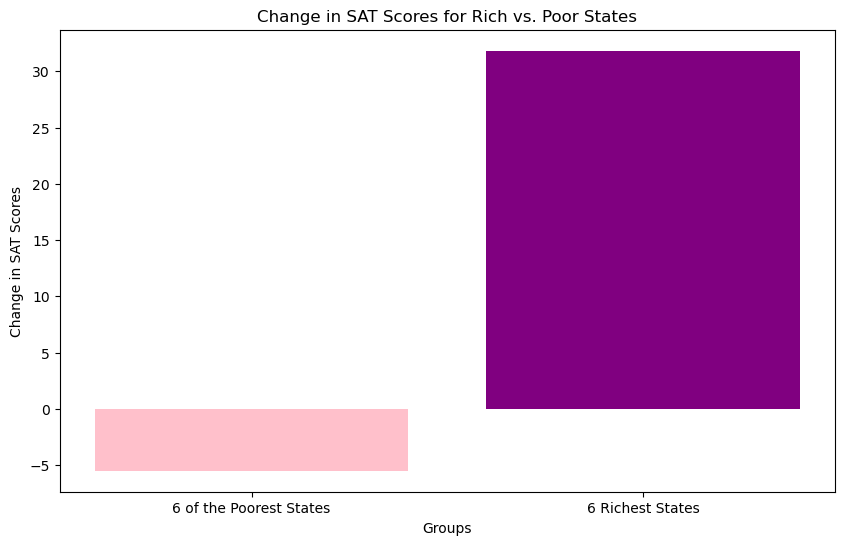

In [14]:
# Picking the same 2 groups of 6 states we used for our initial analysis
states_group_1 = ['Florida', 'Idaho', 'Indiana', 'New Mexico', 'South Carolina', 'Texas']
states_group_2 = ['Colorado', 'Connecticut', 'Maryland', 'Massachusetts', 'New Jersey', 'New York']

sat_2020 = pd.read_csv('sat20.csv')
sat_2021 = pd.read_csv('sat21.csv')

# Looking at the changes for poor states
change_group_1 = sat_2021[sat_2021['States'].isin(states_group_1)]['Mean of Total'].mean() - \
                 sat_2020[sat_2020['States'].isin(states_group_1)]['Mean of Total'].mean()

# Looking at the changes for rich states
change_group_2 = sat_2021[sat_2021['States'].isin(states_group_2)]['Mean of Total'].mean() - \
                 sat_2020[sat_2020['States'].isin(states_group_2)]['Mean of Total'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['6 of the Poorest States', '6 Richest States'], [change_group_1, change_group_2], color=['pink', 'purple'])
plt.xlabel('Groups')
plt.ylabel('Change in SAT Scores')
plt.title('Change in SAT Scores for Rich vs. Poor States')
plt.show()


It is incredibly clear that rich states had a huge increase in SAT scores from 2020 to 2021 while poorer states struggled as we notice a decrease in SAT scores from 2020 to 2021 for them.

## Conclusion
The shift to online learning caused by the COVID-19 pandemic has changed education around the world. Our study looked at how it affected student test scores for people from different income levels. We found a concerning gap - the poorest states had decreased SAT scores, while the richest states had increased scores from 2020 to 2021. The drastic difference between low and high income students' SAT scores shows that remote learning has a disproportionate and inequitable impact.

These findings make it clear that it is necessary to take steps to help students from poorer backgrounds. They may not have access to good technology or support that wealthier students have. Going forward, we need to make online learning more fitted to the different situations students come from based on their family's income level. This will create a fairer educational environment for all.  

By carefully using data, policymakers and teachers can improve online learning systems to reduce these inequalities. They can ensure all students have equal opportunities to learn, no matter their income level. This will lead to a stronger, more inclusive education system after the pandemic.